<a href="https://colab.research.google.com/github/Dvdbijl/Global_CO2_Emissions/blob/main/Global_CO2_Emissions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
co2_emissions = pd.read_csv("/content/co2_emissions.csv")
print(co2_emissions)

                            Country      1990      2005      2017      2021
0                             World 22,674.12 30,049.81 37,077.40 37,857.58
1    World – International Aviation    258.94    422.78    543.38       NaN
2    World – International Shipping    371.80    572.17    677.25       NaN
3                       Afghanistan      2.55      1.06     11.42      8.35
4                           Albania      6.58      4.20      5.03      4.59
..                              ...       ...       ...       ...       ...
207                         Vietnam     20.18     99.23    218.73    321.41
208                  Western Sahara      0.14      0.23      0.28      0.24
209                           Yemen      6.89     21.77     12.50     12.05
210                          Zambia      2.96      2.46      4.97      7.01
211                        Zimbabwe     17.18     11.39     12.09     12.29

[212 rows x 5 columns]


In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
co2_emissions

,Country,1990,2005,2017,2021
0,World,"22,674.12","30,049.81","37,077.40","37,857.58"
1,World – International Aviation,258.94,422.78,543.38,NaN
2,World – International Shipping,371.80,572.17,677.25,NaN
3,Afghanistan,2.55,1.06,11.42,8.35
4,Albania,6.58,4.20,5.03,4.59
...,...,...,...,...,...
207,Vietnam,20.18,99.23,218.73,321.41
208,Western Sahara,0.14,0.23,0.28,0.24
209,Yemen,6.89,21.77,12.50,12.05
210,Zambia,2.96,2.46,4.97,7.01


In [ ]:
co2_emissions_countries = co2_emissions.loc[3:]
co2_countries = co2_emissions_countries.drop(67)
co2_countries

,Country,1990,2005,2017,2021
3,Afghanistan,2.55,1.06,11.42,8.35
4,Albania,6.58,4.20,5.03,4.59
5,Algeria,65.68,98.20,159.93,173.00
6,Angola,5.85,15.97,30.88,24.45
7,Anguilla,0.01,0.01,0.03,0.03
...,...,...,...,...,...
207,Vietnam,20.18,99.23,218.73,321.41
208,Western Sahara,0.14,0.23,0.28,0.24
209,Yemen,6.89,21.77,12.50,12.05
210,Zambia,2.96,2.46,4.97,7.01


In [ ]:
top_5 = co2_countries.loc[[42, 202, 93, 158, 102]]
top_5

,Country,1990,2005,2017,2021
42,China,"2,397.05","6,263.06","10,877.22","12,466.32"
202,United States,"5,085.90","5,971.57","5,107.39","4,752.08"
93,India,605.97,"1,210.75","2,454.77","2,648.78"
158,Russia,"2,378.92","1,733.95","1,764.87","1,942.54"
102,Japan,"1,149.40","1,276.86","1,320.78","1,084.69"


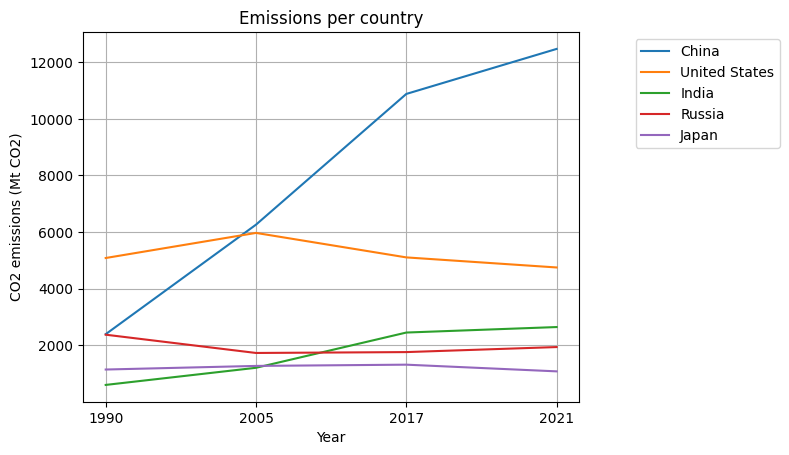

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

years = top_5.columns[1:]

for index, row in top_5.iterrows():
  plt.plot(years, row[1:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("CO2 emissions (Mt CO2)")

ax.set_title("Emissions per country")
ax.grid(True)

plt.show()


In [ ]:
co2_countries['RA90'] = co2_countries.loc[:,'1990'] / co2_countries.loc[:,'1990'] * 100
co2_countries['RA05'] = co2_countries.loc[:,'2005'] / co2_countries.loc[:,'1990'] * 100
co2_countries['RA17'] = co2_countries.loc[:,'2017'] / co2_countries.loc[:,'1990'] * 100
co2_countries['RA21'] = co2_countries.loc[:,'2021'] / co2_countries.loc[:,'1990'] * 100

In [ ]:
co2_countries

,Country,1990,2005,2017,2021,RA90,RA05,RA17,RA21
3,Afghanistan,2.55,1.06,11.42,8.35,100.00,41.75,448.63,327.97
4,Albania,6.58,4.20,5.03,4.59,100.00,63.74,76.35,69.73
5,Algeria,65.68,98.20,159.93,173.00,100.00,149.52,243.51,263.41
6,Angola,5.85,15.97,30.88,24.45,100.00,273.03,527.70,417.88
7,Anguilla,0.01,0.01,0.03,0.03,100.00,233.33,466.67,500.00
...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.18,99.23,218.73,321.41,100.00,491.68,"1,083.78","1,592.56"
208,Western Sahara,0.14,0.23,0.28,0.24,100.00,157.64,191.67,166.67
209,Yemen,6.89,21.77,12.50,12.05,100.00,316.07,181.54,174.97
210,Zambia,2.96,2.46,4.97,7.01,100.00,83.15,168.09,237.23


In [ ]:
best_changers = co2_countries.sort_values(by=['RA21'])
best_changers_top_3 = best_changers.head(3)

worst_changers = co2_countries.sort_values(by='RA21', ascending=False)
worst_changers_top_3 = worst_changers.head(3)

In [ ]:
best_changers_top_3.columns = ["Country", "90", "05", "17", "21", "1990", "2005", "2017", "2021"]

In [ ]:
worst_changers_top_3.columns = ["Country", "90", "05", "17", "21", "1990", "2005", "2017", "2021"]

In [ ]:
best_and_worst = [best_changers_top_3, worst_changers_top_3]
best_and_worst = pd.concat(best_and_worst)
best_and_worst.columns = ["Country", "90", "05", "17", "21", "1990", "2005", "2017", "2021"]
best_and_worst

,Country,90,05,17,21,1990,2005,2017,2021
199,Ukraine,783.21,354.43,205.72,185.46,100.00,45.25,26.27,23.68
128,Moldova,31.96,8.14,8.26,9.55,100.00,25.47,25.86,29.88
10,Armenia,20.70,4.54,4.83,6.77,100.00,21.94,23.34,32.71
81,Greenland,0.00,0.63,0.52,0.46,100.00,"21,033.33","17,266.67","15,333.33"
109,Laos,0.21,1.04,2.82,20.56,100.00,491.94,"1,335.55","9,744.08"
62,Equatorial Guinea,0.10,3.37,2.47,7.00,100.00,"3,475.26","2,545.36","7,216.49"


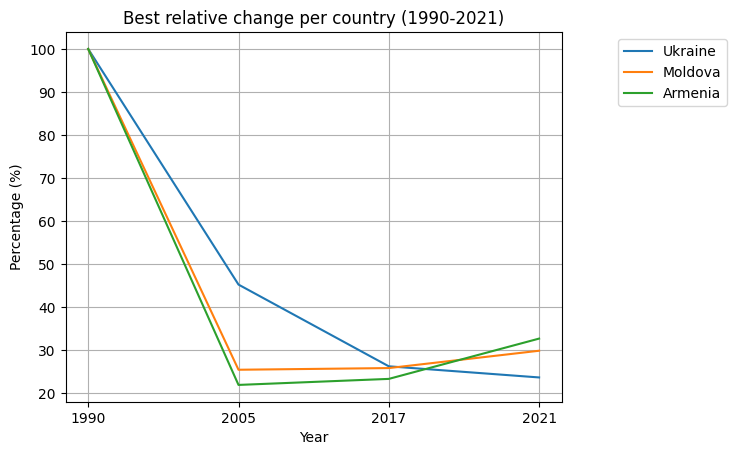

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = best_changers_top_3.columns[5:]

for index, row in best_changers_top_3.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

ax.set_title("Best relative change per country (1990-2021)")
ax.grid(True)

plt.show()

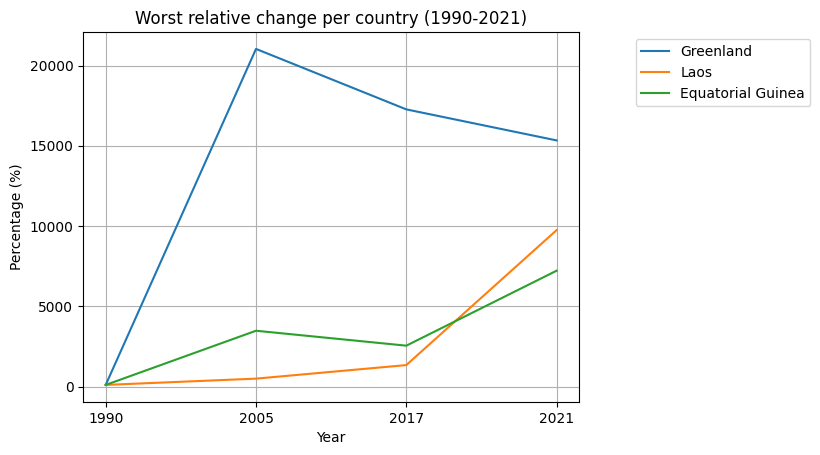

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = worst_changers_top_3.columns[5:]

for index, row in worst_changers_top_3.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

ax.set_title("Worst relative change per country (1990-2021)")
ax.grid(True)

plt.show()

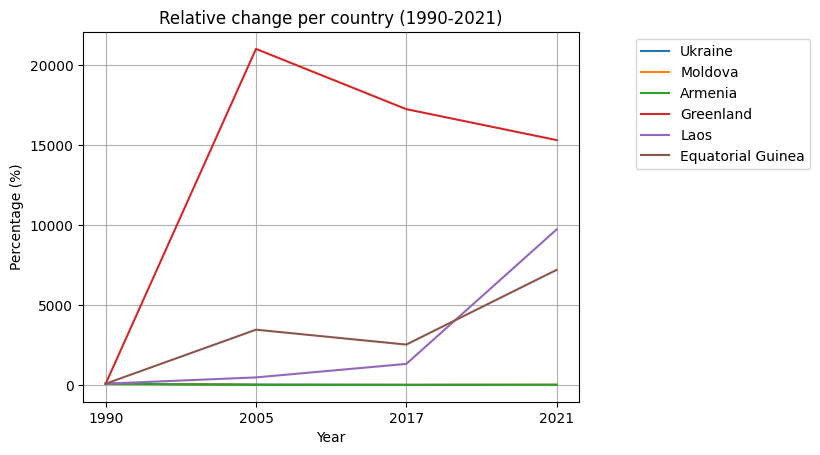

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = best_and_worst.columns[5:]

for index, row in best_and_worst.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

ax.set_title("Relative change per country (1990-2021)")
ax.grid(True)

plt.show()

In [ ]:
new_co2_countries = co2_countries
new_co2_countries.columns = ["Country", "year90", "year05", "year17", "year21", "1990", "2005", "2017", "2021"]

new_co2_countries = new_co2_countries.loc[new_co2_countries.year90 > 5]
new_best_changers = new_co2_countries.sort_values(by=['2021'])
new_best_changers_top_3 = new_best_changers.head(3)

new_worst_changers = new_co2_countries.sort_values(by='2021', ascending=False)
new_worst_changers_top_3 = new_worst_changers.head(3)


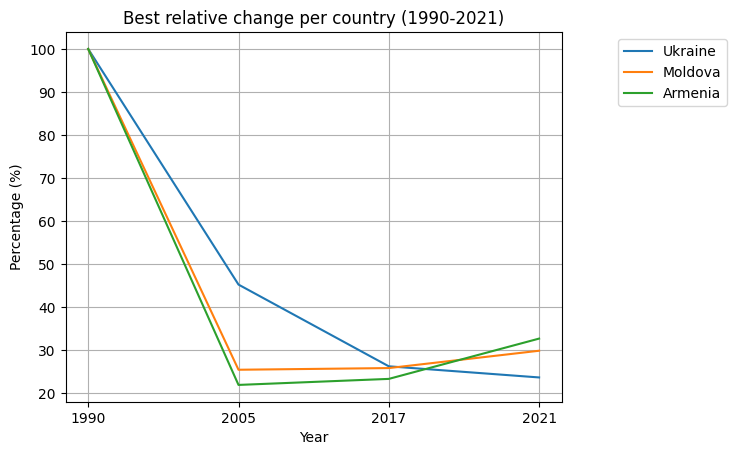

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = new_best_changers_top_3.columns[5:]

for index, row in new_best_changers_top_3.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

ax.set_title("Best relative change per country (1990-2021)")
ax.grid(True)

plt.show()

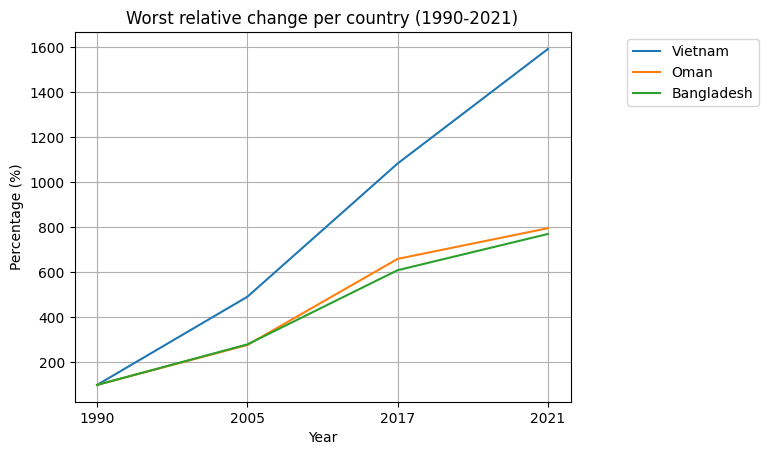

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = new_worst_changers_top_3.columns[5:]

for index, row in new_worst_changers_top_3.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

ax.set_title("Worst relative change per country (1990-2021)")
ax.grid(True)

plt.show()

In [ ]:
new_best_and_worst = [new_best_changers_top_3, new_worst_changers_top_3]
new_best_and_worst = pd.concat(new_best_and_worst)

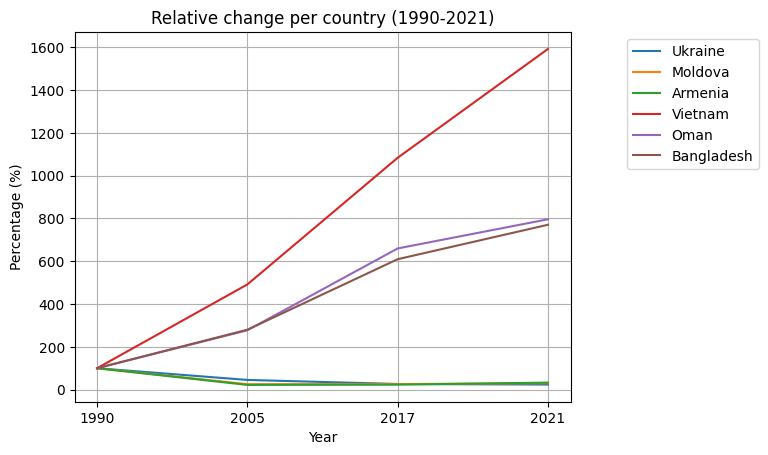

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = new_best_and_worst.columns[5:]

for index, row in new_best_and_worst.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

ax.set_title("Relative change per country (1990-2021)")
ax.grid(True)

plt.show()